In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np

#dataset import
dataset = pd.read_csv('d://data.csv') 


In [26]:

dataset.drop('filename',axis=1,inplace=True)
dataset.drop('rmse',axis=1,inplace=True)
dataset.drop('rolloff',axis=1,inplace=True)
dataset.drop('zero_crossing_rate',axis=1,inplace=True)


dataset.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1784.420446,2002.650192,-113.596742,121.557302,-19.158825,42.351029,-6.376457,18.618875,-13.697911,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,0.340983,1529.835316,2038.617579,-207.556796,124.006717,8.930562,35.874684,2.916038,21.523725,-8.554703,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,0.363603,1552.481958,1747.165985,-90.754394,140.459907,-29.109965,31.689014,-13.987036,25.754761,-13.649586,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,0.404779,1070.119953,1596.333948,-199.431144,150.099218,5.647594,26.871927,1.754463,14.238344,-4.830882,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,0.308590,1835.494603,1748.362448,-160.266031,126.198800,-35.605448,22.153301,-32.489270,10.864512,-23.357929,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


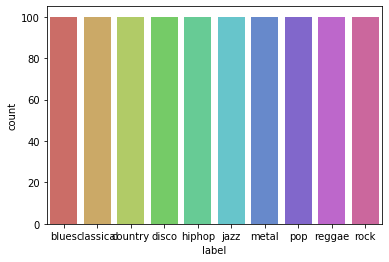

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(x='label' ,data= dataset, palette='hls')
plt.show()

In [28]:
X = dataset.iloc[:,0:23].values
y = dataset.iloc[:,23].values
# label_encoder object knows how to understand word labels
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [29]:
len(X_test)
#Y

100

In [30]:
model = Sequential()

model.add(Dense(28,input_shape=(23,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train,epochs=100,batch_size=10,validation_data = (X_test,y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28)                672       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                290       
Total params: 962
Trainable params: 962
Non-trainable params: 0
_________________________________________________________________
Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 0s 428us/step - loss: 7.6822 - accuracy: 0.0856 - val_loss: 6.2188 - val_accuracy: 0.2500
Epoch 2/100
900/900 [==============================] - 0s 233us/step - loss: 7.6144 - accuracy: 0.1967 - val_loss: 6.1202 - val_accuracy: 0.1400
Epoch 3/100
900/900 [==============================] - 0s 205us/step - loss: 7.4856 - accuracy: 0.2389 - val_loss: 7.1748 - val_accuracy: 0.2000
Epoch 4/100
900/900 [================

In [31]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print( accuracy_score(y_test_class, y_pred_class))

0.48


In [32]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
c=confusion_matrix(y_test_class,y_pred_class)
print(c)


              precision    recall  f1-score   support

           0       0.48      0.87      0.62        15
           1       0.93      0.93      0.93        14
           2       0.14      0.15      0.15        13
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         7
           6       0.64      0.82      0.72        11
           7       0.48      0.92      0.63        12
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         4

    accuracy                           0.48       100
   macro avg       0.27      0.37      0.30       100
weighted avg       0.35      0.48      0.40       100

[[13  0  0  0  0  1  1  0  0  0]
 [ 0 13  0  0  0  1  0  0  0  0]
 [ 7  0  2  0  0  0  1  1  0  2]
 [ 2  0  0  0  0  0  2  3  0  1]
 [ 1  0  3  0  0  0  1  4  0  0]
 [ 1  1  4  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  9  1  0  0]
 [ 0  0  1

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(10.5, -0.5)

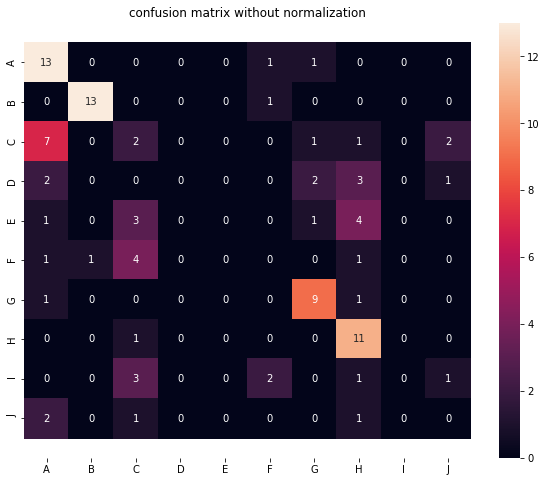

In [33]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn

df_cm = pd.DataFrame(c, index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [34]:
total=np.sum(c,axis=1)
c=c/total[:None]

In [35]:
print('confusion matrix with normalization')
c

confusion matrix with normalization


array([[0.86666667, 0.        , 0.        , 0.        , 0.        ,
        0.14285714, 0.09090909, 0.        , 0.        , 0.        ],
       [0.        , 0.92857143, 0.        , 0.        , 0.        ,
        0.14285714, 0.        , 0.        , 0.        , 0.        ],
       [0.46666667, 0.        , 0.15384615, 0.        , 0.        ,
        0.        , 0.09090909, 0.08333333, 0.        , 0.5       ],
       [0.13333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.18181818, 0.25      , 0.        , 0.25      ],
       [0.06666667, 0.        , 0.23076923, 0.        , 0.        ,
        0.        , 0.09090909, 0.33333333, 0.        , 0.        ],
       [0.06666667, 0.07142857, 0.30769231, 0.        , 0.        ,
        0.        , 0.        , 0.08333333, 0.        , 0.        ],
       [0.06666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.81818182, 0.08333333, 0.        , 0.        ],
       [0.        , 0.        , 0.0769230

(10.5, -0.5)

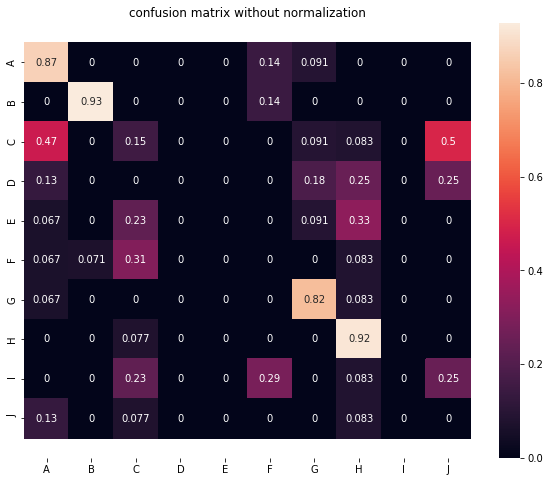

In [36]:
df_cm = pd.DataFrame(c, index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)